# Importing Libraries

In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [3]:
df = pd.read_csv('NEW_LOAN_DATA.csv')
df

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,2500.0,15.27,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,1
1,10000.0,13.49,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,1,0,0,0,0,1,0
2,3000.0,12.69,80000.0,0,17.94,0.0,0.0,15.0,0.0,27783.0,...,0,0,0,1,0,0,0,0,0,1
3,5000.0,7.90,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,1,1,0
4,7000.0,15.96,47004.0,1,23.51,0.0,1.0,7.0,0.0,17726.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38501,20425.0,15.96,29000.0,0,11.42,0.0,8.0,10.0,1.0,3879.0,...,0,0,0,0,0,0,0,0,1,0
38502,4400.0,17.86,125000.0,0,25.77,1.0,0.0,18.0,1.0,68438.0,...,0,0,0,0,0,0,0,0,1,0
38503,5700.0,13.43,65000.0,0,18.22,0.0,3.0,15.0,1.0,3023.0,...,0,0,0,0,0,0,0,0,1,0
38504,6000.0,12.80,57000.0,0,15.20,2.0,4.0,13.0,1.0,13622.0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.dtypes

loan_amnt                              float64
int_rate                               float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
collection_recovery_fee                float64
acc_now_delinq                         float64
delinq_amnt                            float64
pub_rec_bankruptcies                   float64
tax_liens                              float64
home_ownership_MORTGAGE                  int64
home_ownership_OTHER                     int64
home_ownership_OWN                       int64
home_ownership_RENT                      int64
verification_

# Defining X and Y values for Modelling

In [23]:
features = df[df.columns.drop('loan_status')]     # X
target = df['loan_status']                        # Y

In [24]:
target.value_counts()

1    31481
0     7025
Name: loan_status, dtype: int64

# Solving the problem of class imbalance by undersampling the majority class using sklearn's resample technique

In [7]:
from sklearn.utils import resample

In [26]:
loan_default_downsampled = resample(df[target == 1],
                                replace = False, # sample without replacement
                                n_samples = len(df[target == 0]), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
loan_df = pd.concat([loan_default_downsampled, df[target == 0]])

In [30]:
features = loan_df[loan_df.columns.drop('loan_status')]     # X
target = loan_df['loan_status']                             # Y

In [31]:
target.value_counts()

0    7025
1    7025
Name: loan_status, dtype: int64

Text(0, 0.5, 'No of rows')

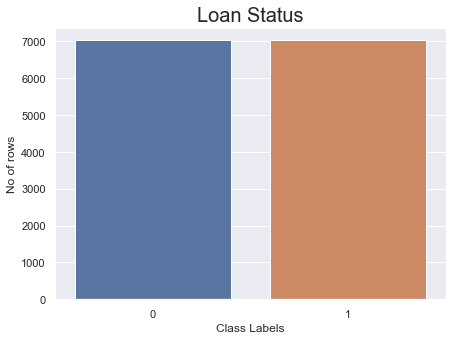

In [33]:
sns.set(rc = {'figure.figsize':(7,5)})

sns.barplot(target.value_counts().index, target.value_counts().values)
plt.title('Loan Status', fontsize=20)

plt.xlabel("Class Labels")
plt.ylabel("No of rows")

# Splitting the dataset into training and testing set

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)

accuracy_score(predictions, Y_test)

0.7810987759749501

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, Y_test)

array([[1182,  206],
       [ 563, 1562]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75      1388
           1       0.88      0.74      0.80      2125

    accuracy                           0.78      3513
   macro avg       0.78      0.79      0.78      3513
weighted avg       0.80      0.78      0.78      3513



# Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced")

rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

accuracy_score(predictions, Y_test)

0.8559635639054939

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, Y_test)

array([[1316,   77],
       [ 429, 1691]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1393
           1       0.96      0.80      0.87      2120

    accuracy                           0.86      3513
   macro avg       0.86      0.87      0.85      3513
weighted avg       0.88      0.86      0.86      3513



# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

accuracy_score(predictions, Y_test)

0.7896384856248221

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, Y_test)

array([[1370,  364],
       [ 375, 1404]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1734
           1       0.79      0.79      0.79      1779

    accuracy                           0.79      3513
   macro avg       0.79      0.79      0.79      3513
weighted avg       0.79      0.79      0.79      3513



# SVC

In [62]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

predictions = svc.predict(X_test)

accuracy_score(predictions, Y_test)

0.5439795046968403

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, Y_test)

array([[ 894,  751],
       [ 851, 1017]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.51      0.54      0.53      1645
           1       0.58      0.54      0.56      1868

    accuracy                           0.54      3513
   macro avg       0.54      0.54      0.54      3513
weighted avg       0.55      0.54      0.54      3513

